In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/archive.zip')

In [ ]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.763885,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105490,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.820000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
print(data.isnull().sum())

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64


In [ ]:
def is_balanced(df, column_name):
    value_counts = df[column_name].value_counts()
    # Define a threshold for imbalance (e.g., 10% difference)
    threshold = 0.1
    max_count = value_counts.max()
    min_count = value_counts.min()
    if max_count / (min_count + 1e-8) < (1 + threshold):  # Add a small value to avoid division by zero
        return True  # Values are balanced
    else:
        return False  # Values are imbalanced

# Example usage for 'Orientation' column
is_orientation_balanced = is_balanced(data, 'Orientation')

if is_orientation_balanced:
    print("The 'Orientation' column is balanced.")
else:
    print("The 'Orientation' column is imbalanced.")

The 'Orientation' column is balanced.


In [ ]:
import seaborn as sns

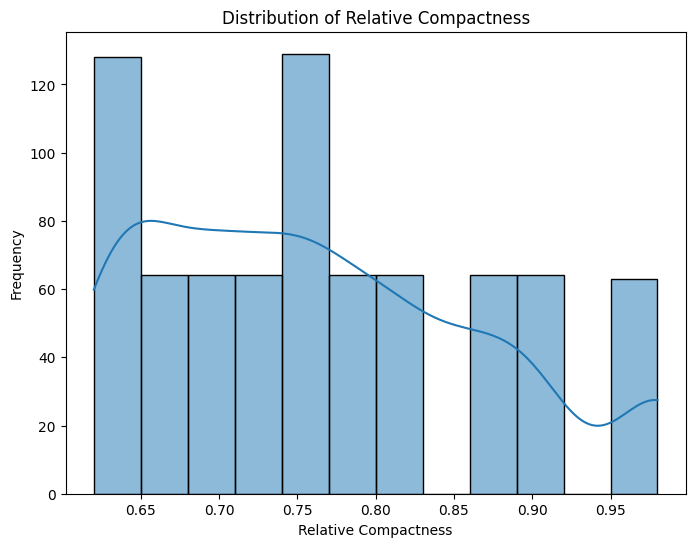

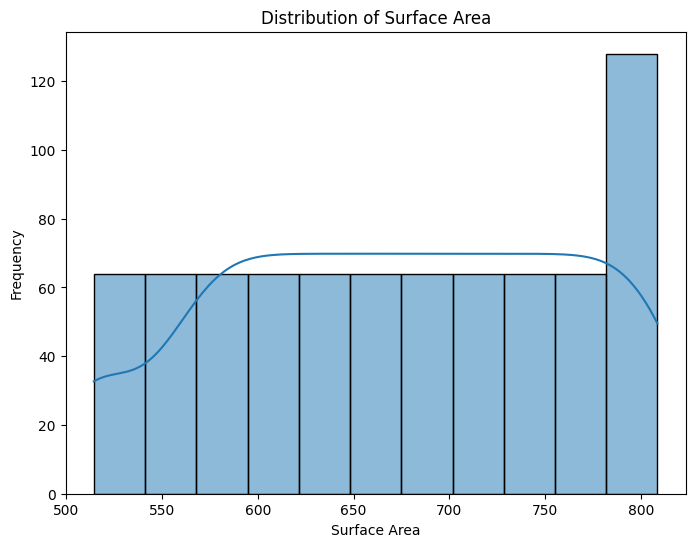

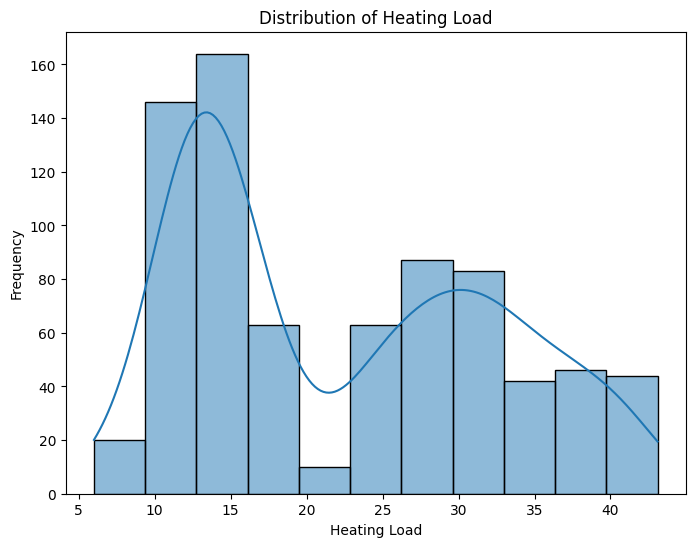

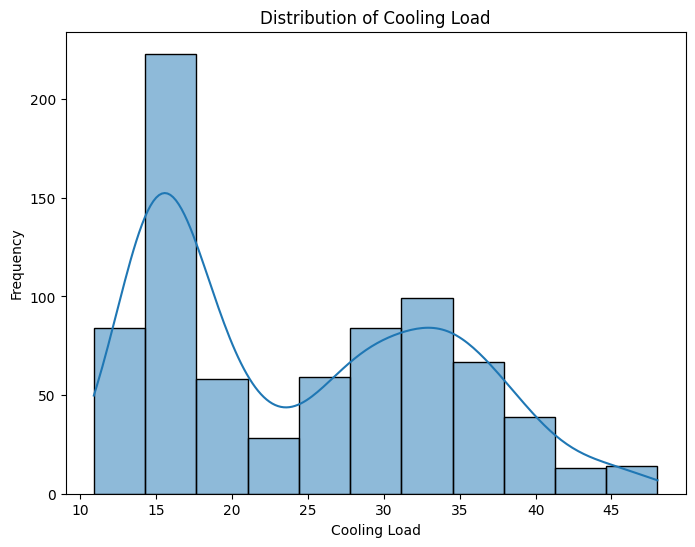

In [ ]:
numerical_cols = ['Relative Compactness', 'Surface Area', 'Heating Load', 'Cooling Load']

# Plot distribution for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # kde for density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

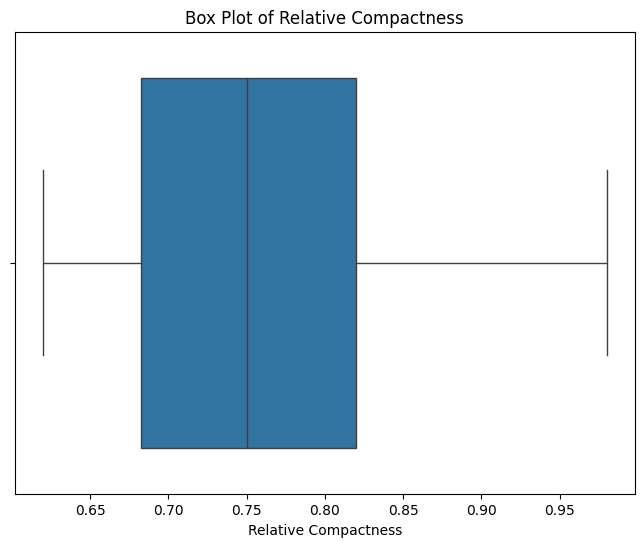

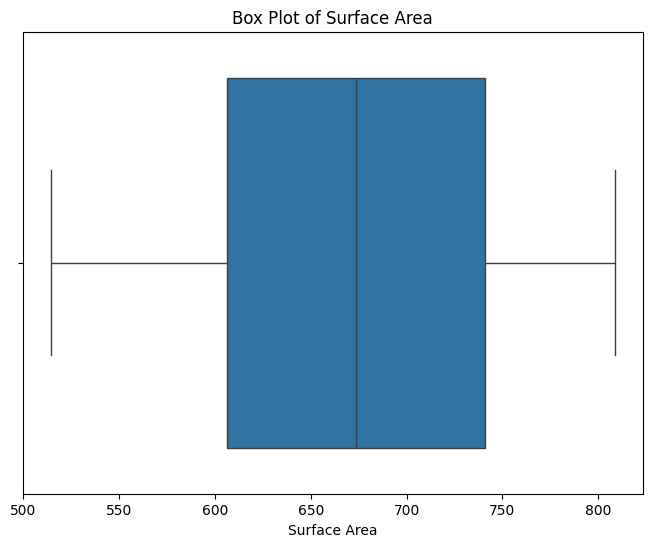

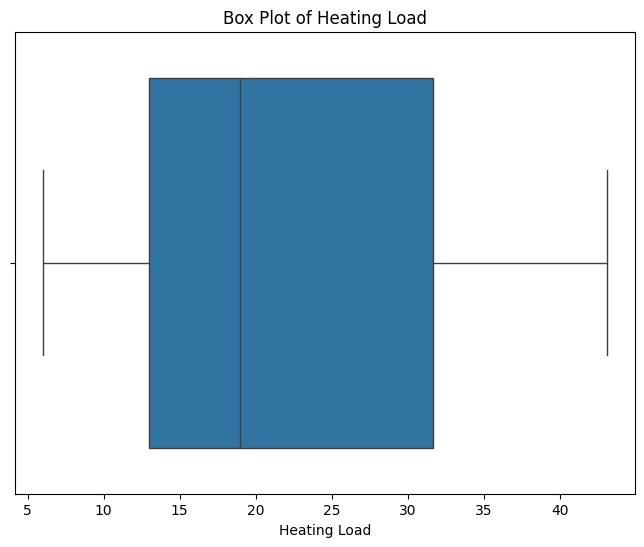

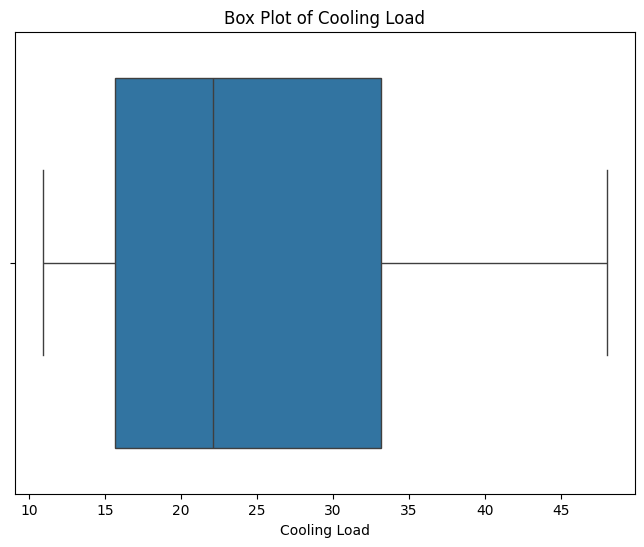

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns from your dataset
numerical_cols = ['Relative Compactness', 'Surface Area', 'Heating Load', 'Cooling Load']

# Create box plots for all features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

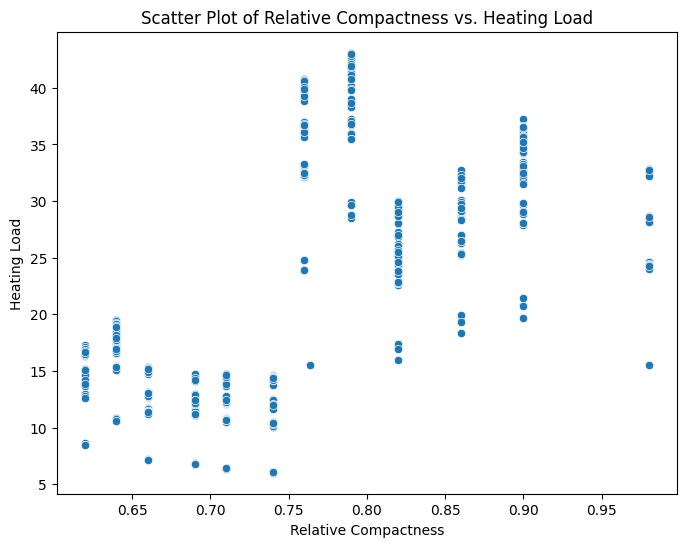

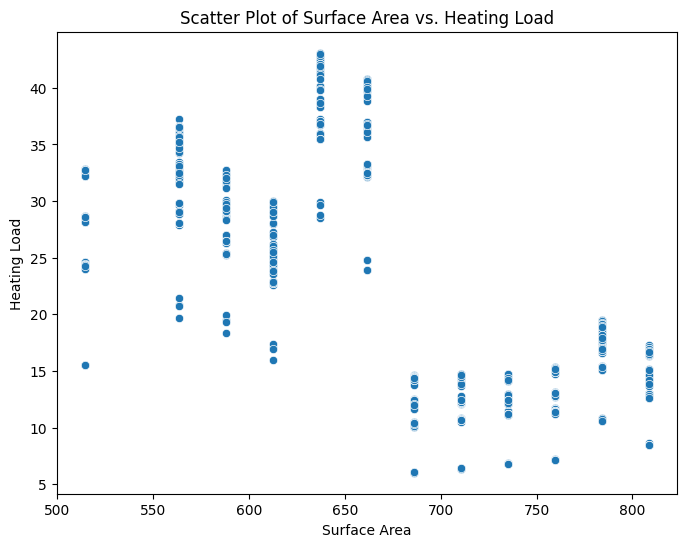

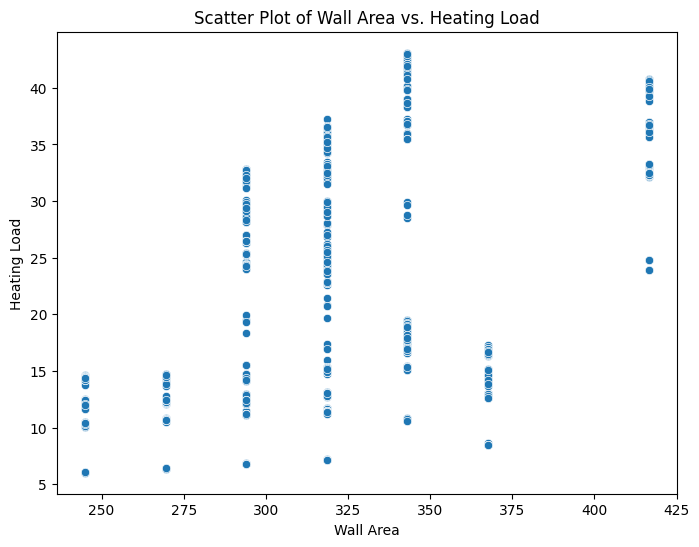

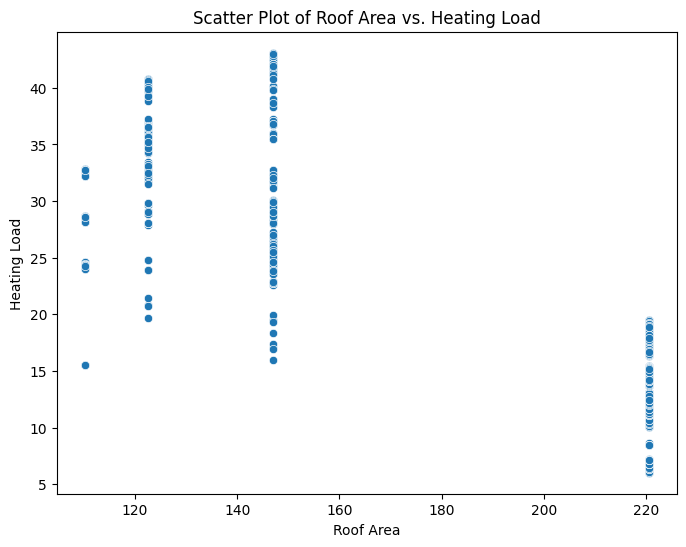

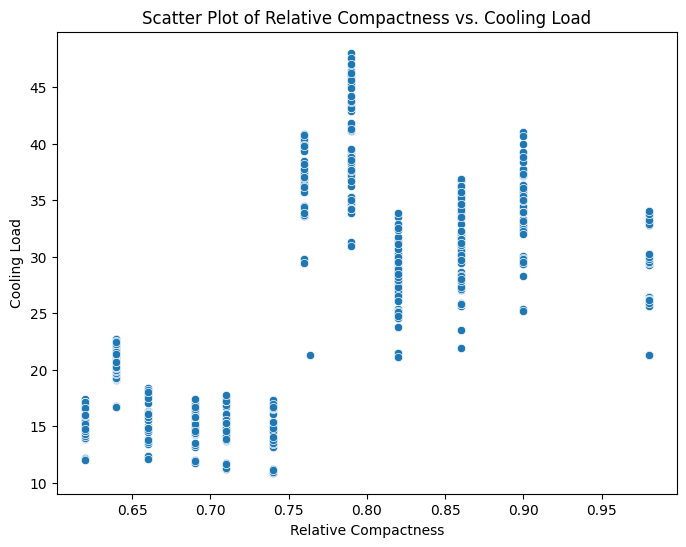

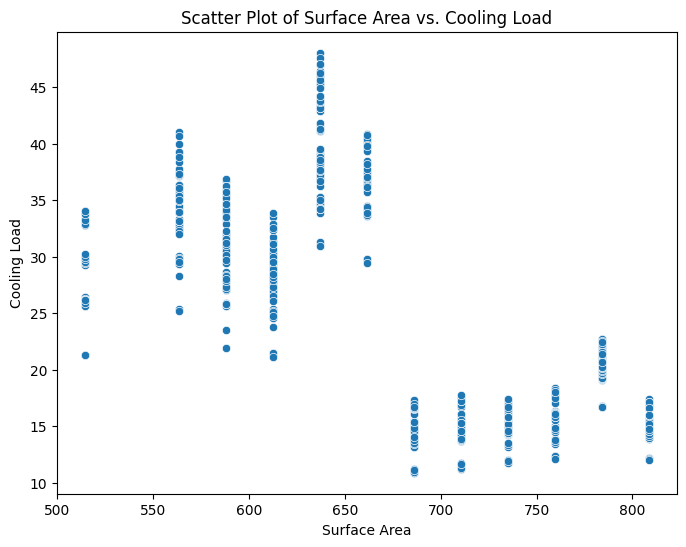

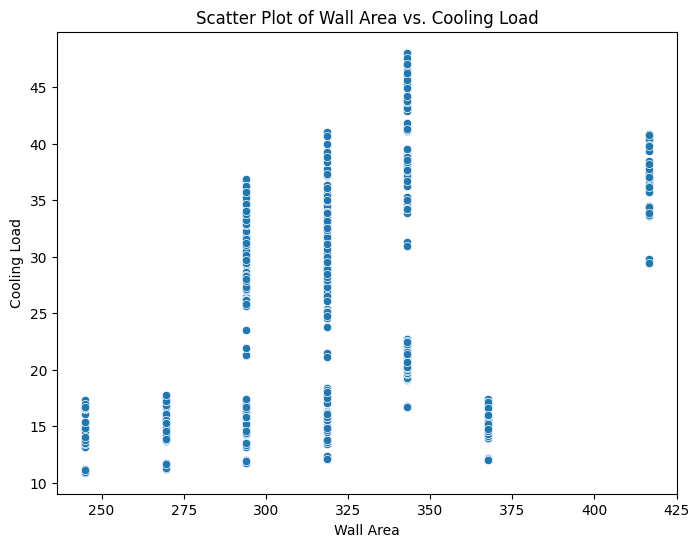

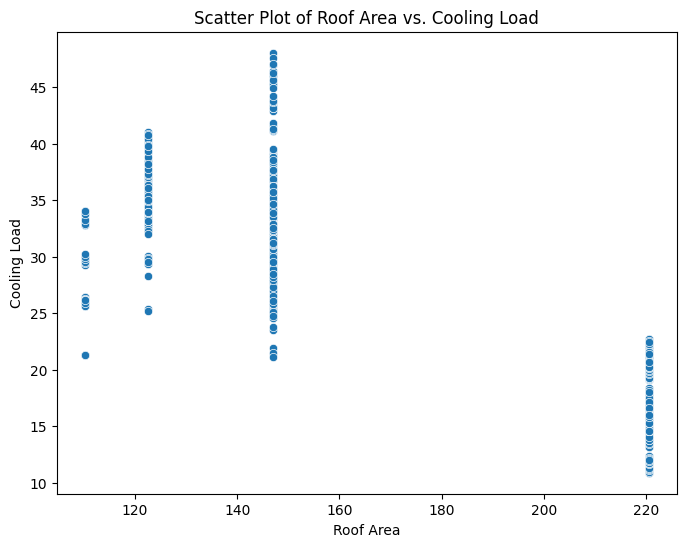

In [ ]:
numerical_cols = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area']

# Create scatter plots for features versus the target variable ('Heating Load')
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data, x=col, y='Heating Load')
    plt.title(f'Scatter Plot of {col} vs. Heating Load')
    plt.xlabel(col)
    plt.ylabel('Heating Load')
    plt.show()

# Create scatter plots for features versus the target variable ('Cooling Load')
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data, x=col, y='Cooling Load')
    plt.title(f'Scatter Plot of {col} vs. Cooling Load')
    plt.xlabel(col)
    plt.ylabel('Cooling Load')
    plt.show()

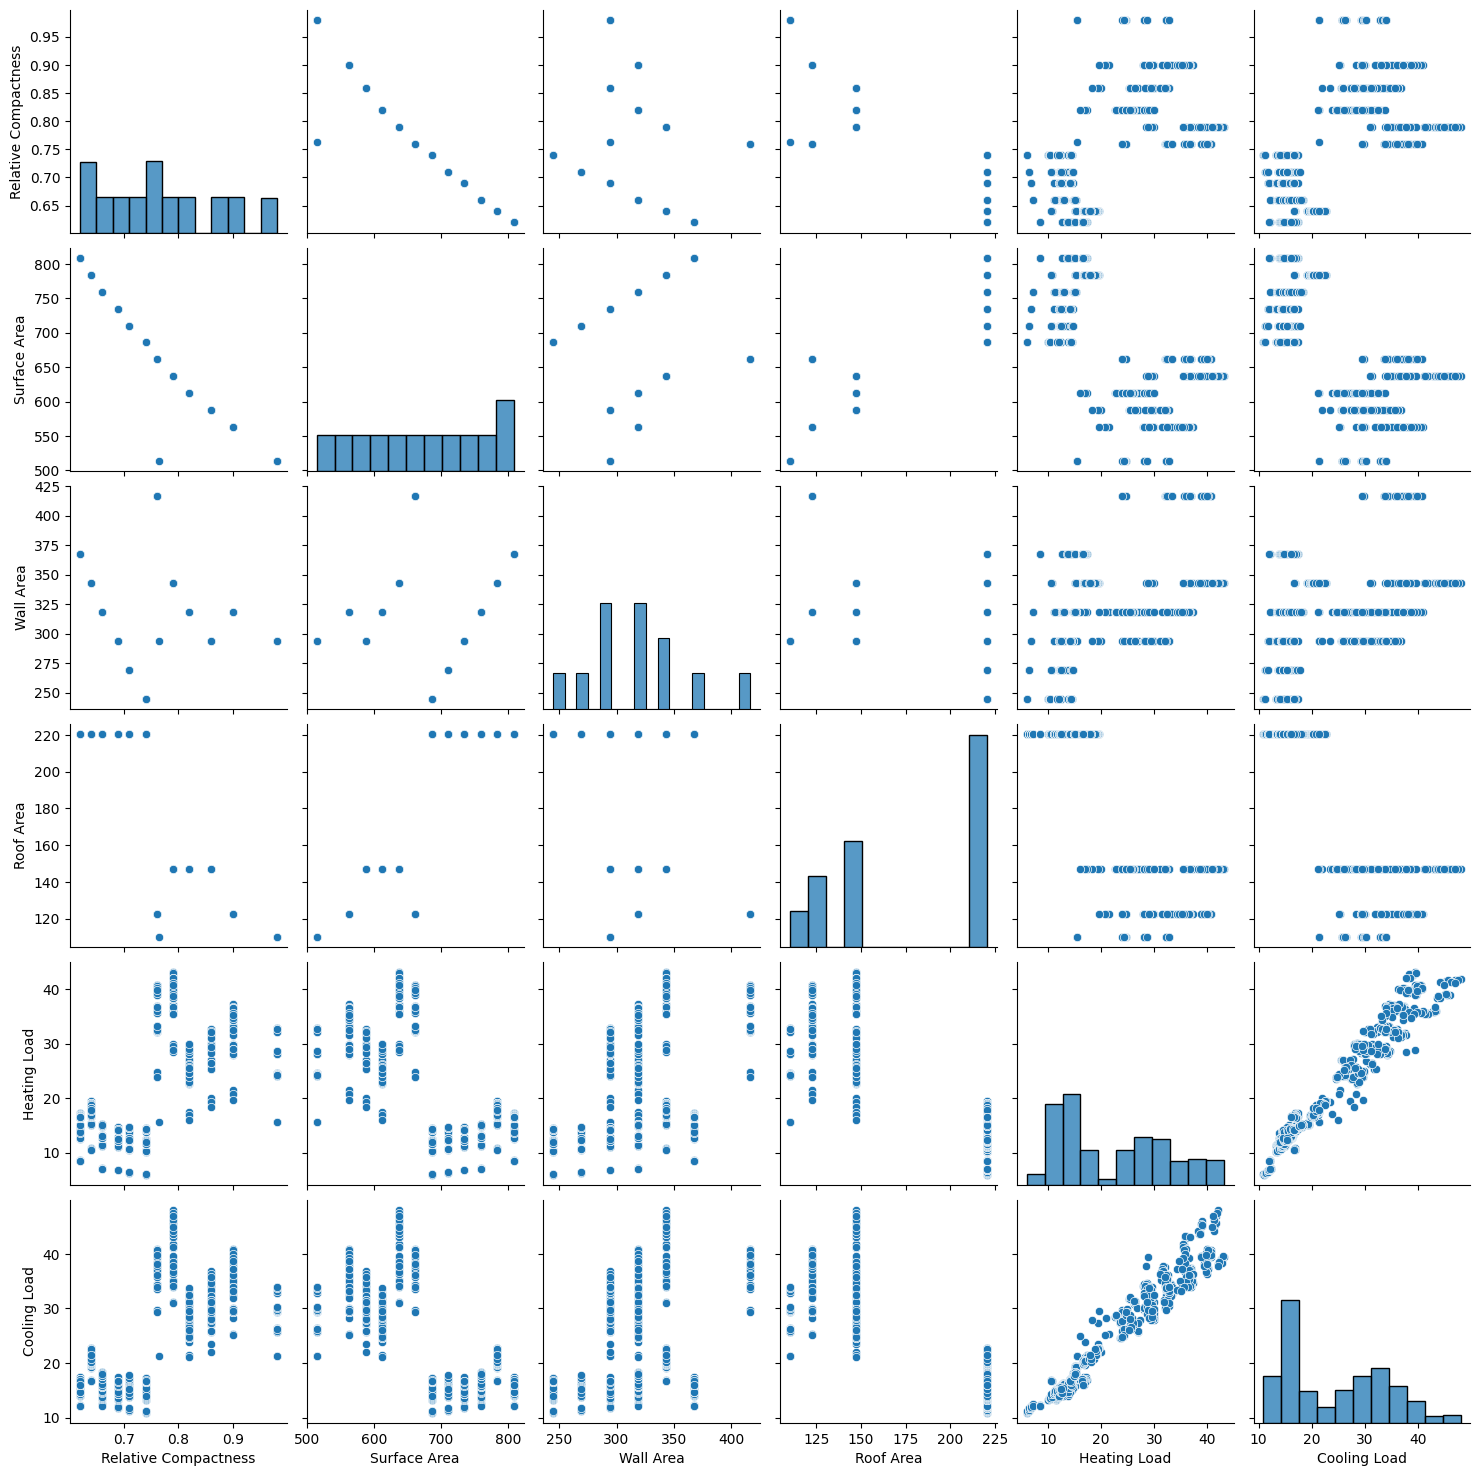

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pair plot for all numerical features
sns.pairplot(data[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Heating Load', 'Cooling Load']])
plt.show()

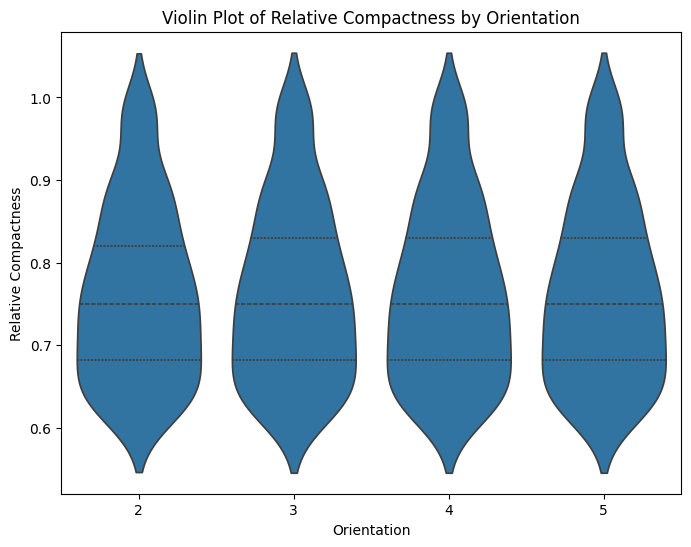

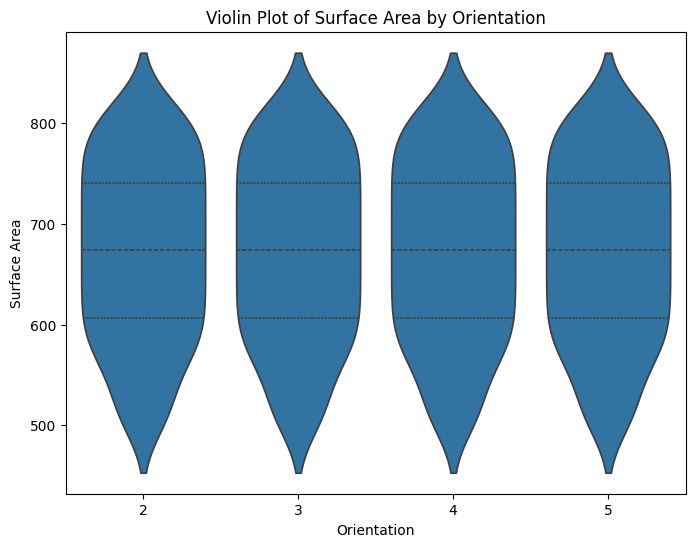

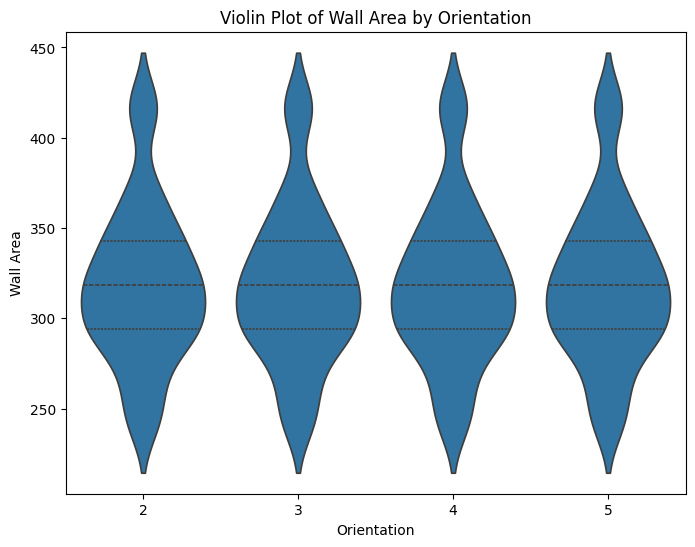

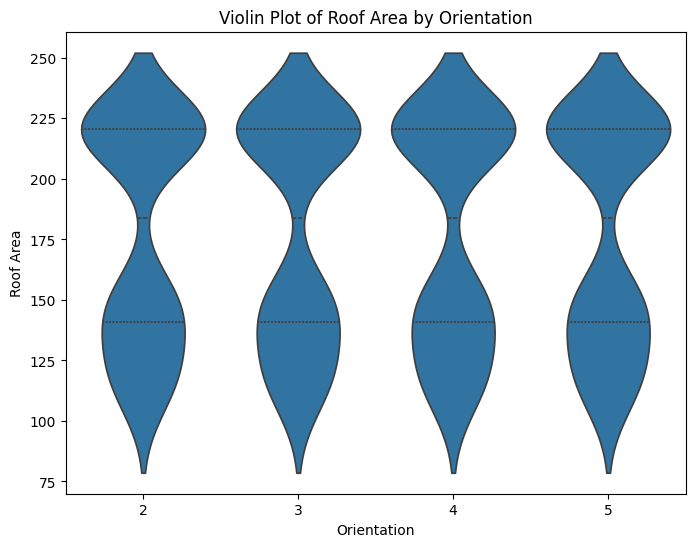

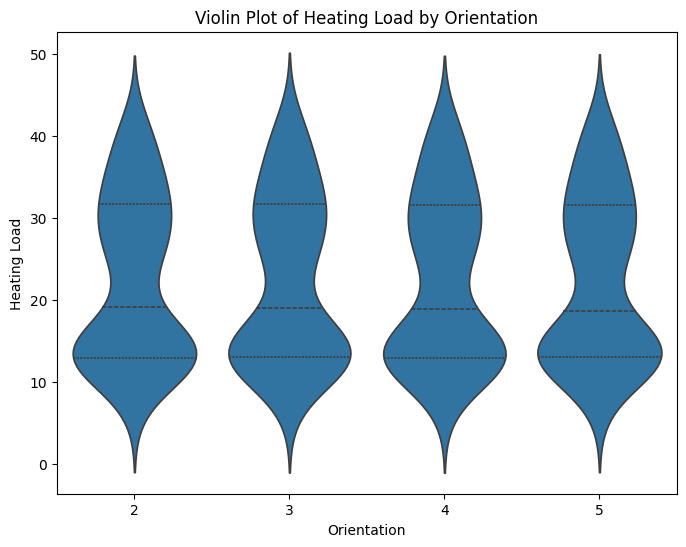

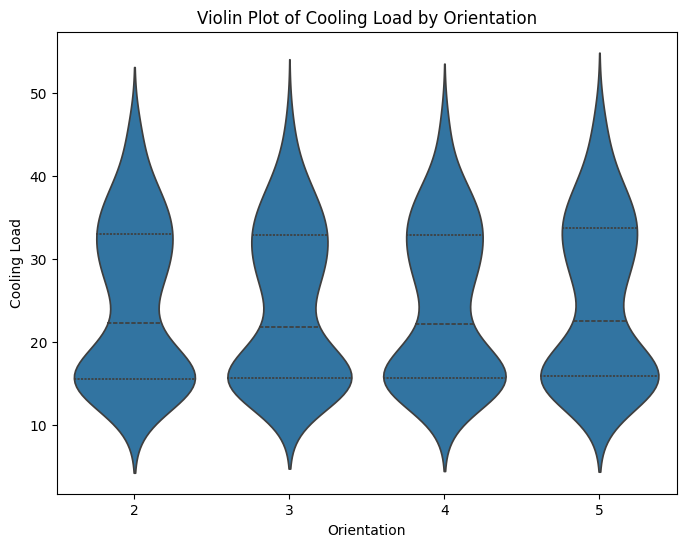

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is in a CSV file, for example:
# df = pd.read_csv("your_data.csv")

# List of numerical columns from your dataset
numerical_cols = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Heating Load', 'Cooling Load']

# Make sure the DataFrame `df` is loaded before plotting
# Example: if your data is stored in a CSV file, load it like this:
# df = pd.read_csv("path_to_your_file.csv")

# Create violin plots for numerical features by 'Orientation'
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=data, x='Orientation', y=col, inner='quart')
    plt.title(f'Violin Plot of {col} by Orientation')
    plt.xlabel('Orientation')
    plt.ylabel(col)
    plt.show()


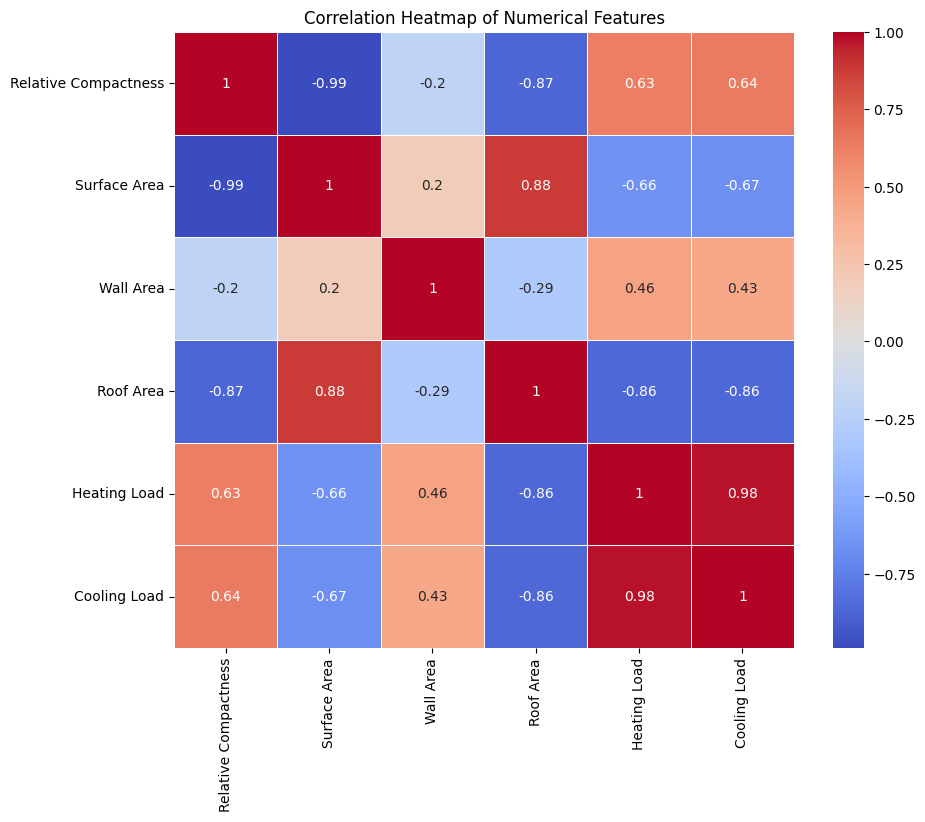

In [ ]:
numerical_cols = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Heating Load', 'Cooling Load']

# Create a correlation matrix for the selected numerical columns
corr_matrix = data[numerical_cols].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Select the features and target variable
X = data[['Relative Compactness', 'Surface Area', 'Wall Area']]  # Replace with your desired features
y = data['Heating Load']  # Replace with your target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Relative Compactness,Surface Area,Wall Area
60,0.82,612.5,318.5
618,0.64,784.0,343.0
346,0.86,588.0,294.0
294,0.90,563.5,318.5
231,0.66,759.5,318.5


In [ ]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_pred = model.predict(X_test_scaled)

# Calculate and print the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 145.8008265571421
Mean Squared Error (MSE): 28129.04527546073
Root Mean Squared Error (RMSE): 167.71715856006125
R² Score: -268.8707381926153


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Save the trained model to a file named 'model.pkl'
joblib.dump(model, 'energy_efficiency_model.pkl')


['energy_efficiency_model.pkl']

In [ ]:
import joblib
import pandas as pd

# Load the trained model
loaded_model = joblib.load('energy_efficiency_model.pkl')

# Sample data for prediction (replace with your actual data)
new_data = pd.DataFrame({
    'Relative Compactness': [0.85],
    'Surface Area': [550],
    'Wall Area': [300]
})

# Make predictions
predictions = loaded_model.predict(new_data)
print(f"Prediction: {predictions}")



Prediction: [35.59741528]


In [ ]:
predictions = model.predict(X_test)
predictions

array([15.27694168, 14.45930241, 30.37261542, 30.05030448, 14.86812205,
       28.78133271, 30.37261542, 30.37261542, 14.86812205, 31.26160379,
       14.86812205, 38.05779512, 31.26160379, 11.51253924, 14.86812205,
       38.05779512, 38.05779512, 11.51253924, 12.78151101, 38.05779512,
       28.78133271, 30.05030448, 14.45930241, 30.05030448, 14.86812205,
       30.05030448, 31.26160379, 28.78133271, 14.86812205, 15.27694168,
       11.51253924, 11.51253924, 14.86812205, 28.78133271, 30.05030448,
       30.37261542, 30.37261542, 30.05030448, 31.26160379, 12.78151101,
       30.37261542, 11.51253924, 12.78151101, 26.65220881, 13.19033065,
       12.78151101, 14.45930241, 12.78151101, 26.65220881, 31.26160379,
       31.26160379, 14.45930241, 14.45930241, 30.05030448, 12.78151101,
       14.86812205, 11.51253924, 28.78133271, 38.05779512, 38.05779512,
       13.19033065, 15.27694168, 14.45930241, 28.78133271, 30.37261542,
       30.05030448, 30.05030448, 14.45930241, 15.27694168, 11.51

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import numpy as np


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Example dataset (replace this with your actual data)
data = {
    'Relative Compactness': [0.7638, 0.9800, 0.9800, 0.9800, 0.9000],
    'Surface Area': [514.5, 514.5, 514.5, 514.5, 563.5],
    'Wall Area': [294.0, 294.0, 294.0, 294.0, 318.5],
    'Roof Area': [110.25, 110.25, 110.25, 110.25, 122.50],
    'Overall Height': [7.0, 7.0, 7.0, 7.0, 7.0],
    'Orientation': [2, 3, 4, 5, 2],
    'Glazing Area': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Glazing Area Distribution': [0, 0, 0, 0, 0],
    'Heating Load': [15.55, 15.55, 15.55, 15.55, 20.84],
    'Cooling Load': [21.33, 21.33, 21.33, 21.33, 28.28]
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
y = df['Heating Load']  # You can switch to 'Cooling Load' if needed

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (RandomForestRegressor for example)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# For accuracy, convert regression output to categories (if desired)
y_test_class = np.round(y_test)  # Convert to integer classes by rounding
y_pred_class = np.round(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print('Confusion Matrix:')
print(conf_matrix)



Confusion Matrix:
[[1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

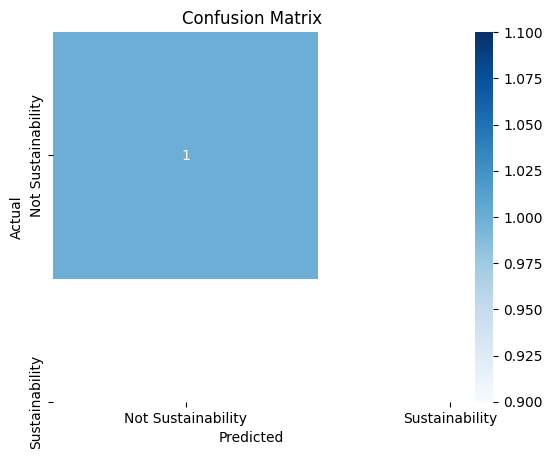

In [12]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sustainability', 'Sustainability'],
            yticklabels=['Not Sustainability', 'Sustainability'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()